# Costa Rican Household Poverty Level Prediction 
Primary objective: Predicting group of income level for households in Costa Rica using individual-level and household-level hh_data. The following are the target variable values:
1 = extreme poverty
2 = moderate poverty
3 = vulnerable households
4 = non vulnerable households

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from collections import OrderedDict
from textwrap import TextWrapper
%matplotlib inline

In [2]:
#Loading the dataset
data = pd.read_csv("train.csv")
data.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


## Data Exploration

### Summary Statistics

In [32]:
data[['age','v2a1','rooms','bedrooms','overcrowding','r4h1','r4h2','r4h3','r4m1','r4m2','r4m3','r4t1','r4t2','r4t3','v18q','tamhog','tamviv','escolari','rez_esc','hhsize','hogar_nin','hogar_adul',
     'hogar_mayor','hogar_total','dependency','edjefe','edjefa','meaneduc','qmobilephone']].describe().rename(columns={
         'overcrowding':'# persons per room',
    'v2a1': 'Monthly rent payment rooms','rooms': 'number of all rooms in the house',
    'v18q1': 'number of tablets household owns', 'r4h1': 'Males younger than 12 years of age',
    'r4h2': 'Males 12 years of age and older', 'r4h3': 'Total males in the household',
    'r4m1': 'Females younger than 12 years of age',
    'r4m2': 'Females 12 years of age and older',
    'r4m3': 'Total females in the household',
    'r4t1': 'persons younger than 12 years of age',
    'r4t2': 'persons 12 years of age and older',
    'r4t3': 'Total persons in the household',
    'tamhog': 'size of the household',
    'tamviv': 'number of persons living in the household',
    'escolari': 'years of schooling',
    'rez_esc': 'Years behind in school',
    'hhsize': 'household size',
    'hogar_nin': 'Number of children 0 to 19 in household',
    'hogar_adul': 'Number of adults in household',
    'hogar_mayor': '# of individuals 65+ in the household',
    'hogar_total': '# of total individuals in the household',
    'dependency': 'Dependency rate',
    'edjefe': 'years of education of male head of household',
    'edjefa': 'years of education of female head of household',
    'meaneduc':'average years of education for adults (18+)',
    'qmobilephone': '# of mobile phones', 'age': 'Age in years', 'v18q':'owns a tablet'
}).transpose()


,count,mean,std,min,25%,50%,75%,max
Age in years,9557.0,34.303547,21.612261,0.0,17.0,31.0,51.0,97.0
Monthly rent payment rooms,2697.0,165231.606971,150457.133301,0.0,80000.0,130000.0,200000.0,2353477.0
number of all rooms in the house,9557.0,4.955530,1.468381,1.0,4.0,5.0,6.0,11.0
bedrooms,9557.0,2.739981,0.944507,1.0,2.0,3.0,3.0,8.0
# persons per room,9557.0,1.605380,0.819946,0.2,1.0,1.5,2.0,6.0
Males younger than 12 years of age,9557.0,0.385895,0.680779,0.0,0.0,0.0,1.0,5.0
Males 12 years of age and older,9557.0,1.559171,1.036574,0.0,1.0,1.0,2.0,8.0
Total males in the household,9557.0,1.945066,1.188852,0.0,1.0,2.0,3.0,8.0
Females younger than 12 years of age,9557.0,0.399184,0.692460,0.0,0.0,0.0,1.0,6.0
Females 12 years of age and older,9557.0,1.661714,0.933052,0.0,1.0,1.0,2.0,6.0


### Label distribution

<Axes: title={'center': 'Label distribution'}, xlabel='Poverty Level', ylabel='Number of households'>

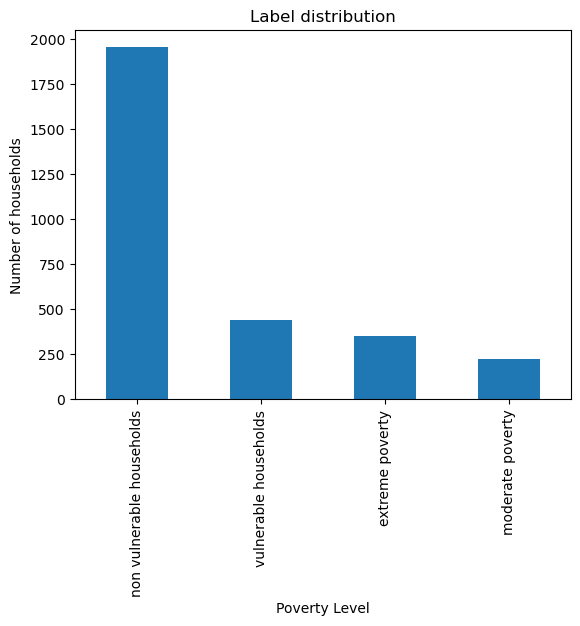

In [33]:
fig, ax = plt.subplots()

# creating the bar plot
labels = [1,2,3,4]
label_codes = {'extreme poverty', 'moderate poverty', 'vulnerable households', 'non vulnerable households'}
hh_data = data.loc[data['parentesco1'] == 1].reset_index().copy()
hh_label = hh_data['Target'].replace(labels,label_codes)
hh_label.value_counts().plot(ax=ax, kind='bar',title="Label distribution", xlabel='Poverty Level', ylabel='Number of households')

## Data Cleaning

In [34]:
#Check if individuals in same family have same label
unique_values = data.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)
different_households = unique_values[unique_values != True]
for each_household in different_households.index:
    true_target = int(data[(data['idhogar'] == each_household) & (data['parentesco1'] == 1.0)]['Target'])
    data.loc[data['idhogar'] == each_household, 'Target'] = true_target
unique_values = data.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)
different_households = unique_values[unique_values != True]
len(different_households)

/var/folders/yj/8zf5zdrs64j27t3z7pz_92x00000gq/T/ipykernel_89276/1740407754.py:5: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  true_target = int(data[(data['idhogar'] == each_household) & (data['parentesco1'] == 1.0)]['Target'])


0

In [35]:
# Calculate the number of missing values in each column
missing_values = pd.DataFrame(data.isnull().sum()).rename(columns={0: 'Number of missing values'})
missing_values['%'] = (missing_values['Number of missing values'] / len(hh_data)) * 100

# Sort the values by percentage of missing values in descending order and display the top 10 columns
top_missing_columns = missing_values.sort_values('%', ascending=False).head().drop('Target', errors='ignore')
top_missing_columns

,Number of missing values,%
rez_esc,7928,266.666667
v18q1,7342,246.955937
v2a1,6860,230.743357
SQBmeaned,5,0.168180
meaneduc,5,0.168180


In [3]:
# Replace null values in v18q1 to 0
data["v18q1"].fillna(0, inplace=True)
data["v2a1"].fillna(0, inplace=True)
data.drop("rez_esc",axis=1, inplace=True)
data.dropna(inplace=True)

In [4]:
#Fix records in dependency,edjefa and edjefe columns by replacing 'yes' with 1 and 'no' with 0
mapping = {"yes": 1, "no": 0}
data['dependency'] = data['dependency'].replace(mapping).astype(np.float64)
data['edjefa'] = data['edjefa'].replace(mapping).astype(np.float64)
data['edjefe'] = data['edjefe'].replace(mapping).astype(np.float64)

In [5]:
#Get household level data
hh_data = data.loc[data['parentesco1'] == 1].reset_index().copy()

In [6]:
#Creating ordinal variables
hh_data['wall_material'] = np.argmax(np.array(hh_data[['paredblolad',	'paredzocalo','paredpreb','pareddes','paredmad', 'paredzinc', 'paredfibras', 'paredother']]),
                           axis = 1)

hh_data['floor_material'] = np.argmax(np.array(hh_data[['pisomoscer',	'pisocemento','pisoother','pisonatur','pisonotiene','pisomadera']]),
                           axis = 1)

hh_data['roof_material'] = np.argmax(np.array(hh_data[['techozinc','techoentrepiso','techocane','techootro']]),
                           axis = 1)
hh_data['water'] = np.argmax(np.array(hh_data[['abastaguadentro','abastaguafuera','abastaguano']]),
                           axis = 1)

hh_data['electricity'] = np.argmax(np.array(hh_data[['public','planpri','noelec','coopele']]),
                           axis = 1)
hh_data['toilet'] = np.argmax(np.array(hh_data[['sanitario1','sanitario2','sanitario3','sanitario5','sanitario6']]),
                           axis = 1)
hh_data['energy'] = np.argmax(np.array(hh_data[['energcocinar1','energcocinar2','energcocinar3','energcocinar4']]),
                           axis = 1)
hh_data['rubbish'] = np.argmax(np.array(hh_data[['elimbasu1','elimbasu2','elimbasu3','elimbasu4','elimbasu5','elimbasu6']]),
                           axis = 1)
hh_data['wall_quality'] = np.argmax(np.array(hh_data[['epared1', 'epared2', 'epared3']]),
                           axis = 1)
hh_data['roof_quality'] = np.argmax(np.array(hh_data[['etecho1', 'etecho2', 'etecho3']]),
                           axis = 1)
hh_data['floor_quality'] = np.argmax(np.array(hh_data[['eviv1', 'eviv2', 'eviv3']]),axis=1)
hh_data['home_ownership'] = np.argmax(np.array(hh_data[['tipovivi1','tipovivi2','tipovivi3','tipovivi4','tipovivi5']]),axis=1)

In [7]:
#Creating new features
hh_data['walls+roof+floor_quality'] = hh_data['wall_quality'] + hh_data['roof_quality'] + hh_data['floor_quality']
hh_data['no_basic_facilities'] = 1 * (hh_data['sanitario1'] + 
                         (hh_data['electricity'] == 0) + 
                         hh_data['pisonotiene'] + 
                         hh_data['abastaguano'] + 
                         (hh_data['cielorazo'] == 0))
hh_data['extra_facilities'] = 1 * (hh_data['refrig'] + 
                      hh_data['computer'] + 
                      (hh_data['v18q1'] > 0) + 
                      hh_data['television']+(hh_data['qmobilephone']>0))
hh_data['rooms_pc'] = hh_data['rooms'] / hh_data['tamviv']

In [8]:
hh_data = hh_data.drop(axis=1,columns=['Id','v18q', 'dis', 'male', 'female', 'estadocivil1', 'estadocivil2', 'estadocivil3', 
            'estadocivil4', 'estadocivil5', 'estadocivil6', 'estadocivil7', 
            'parentesco1', 'parentesco2',  'parentesco3', 'parentesco4', 'parentesco5', 
            'parentesco6', 'parentesco7', 'parentesco8',  'parentesco9', 'parentesco10', 
            'parentesco11', 'parentesco12', 'instlevel1', 'instlevel2', 'instlevel3', 
            'instlevel4', 'instlevel5', 'instlevel6', 'instlevel7', 'instlevel8', 
            'instlevel9', 'mobilephone', 'escolari', 'age','paredblolad',	'paredzocalo','paredpreb','pareddes',
            'paredmad', 'paredzinc', 'paredfibras', 'paredother',
            'pisomoscer',	'pisocemento','pisoother','pisonatur','pisonotiene','pisomadera',
            'techozinc','techoentrepiso','techocane','techootro',
            'abastaguadentro','abastaguafuera','abastaguano',
            'public','planpri','noelec','coopele',
              'sanitario1','sanitario2','sanitario3','sanitario5','sanitario6',
            'energcocinar1','energcocinar2','energcocinar3','energcocinar4',
             'elimbasu1','elimbasu2','elimbasu3','elimbasu4','elimbasu5','elimbasu6',
               'epared1', 'epared2', 'epared3',
                'etecho1', 'etecho2', 'etecho3',
                'eviv1', 'eviv2', 'eviv3',
                 'tipovivi1','tipovivi2','tipovivi3','tipovivi4','tipovivi5'                      
                                      ])

In [9]:
#Get individual level data
ind_data = data[['Id', 'idhogar','v18q', 'dis', 'male', 'female', 'estadocivil1', 'estadocivil2', 'estadocivil3', 
            'estadocivil4', 'estadocivil5', 'estadocivil6', 'estadocivil7', 
            'parentesco1', 'parentesco2',  'parentesco3', 'parentesco4', 'parentesco5', 
            'parentesco6', 'parentesco7', 'parentesco8',  'parentesco9', 'parentesco10', 
            'parentesco11', 'parentesco12', 'instlevel1', 'instlevel2', 'instlevel3', 
            'instlevel4', 'instlevel5', 'instlevel6', 'instlevel7', 'instlevel8', 
            'instlevel9', 'mobilephone', 'escolari', 'age', 'Target']]

## Feature Selection

### Exploring household-level features 

In [12]:
hh_data_viz = hh_data.copy()
hh_data_viz['Target'] = hh_data_viz['Target'].replace([1,2,3,4],{'extreme poverty', 'moderate poverty', 'vulnerable households', 'non vulnerable households'})

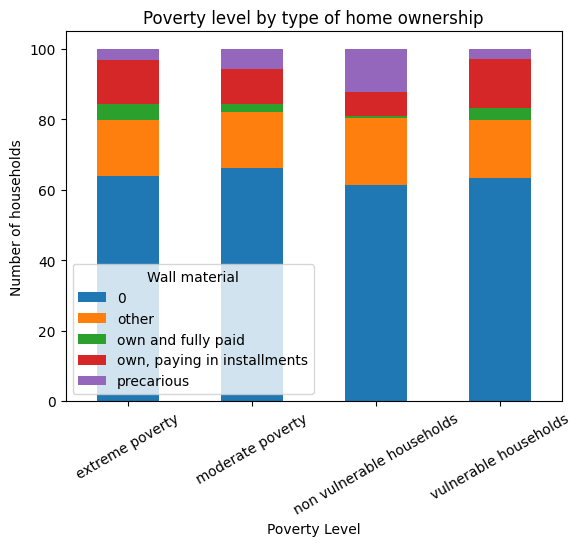

In [13]:
#home ownership
hh_data_viz['home_ownership'] = hh_data_viz['home_ownership'].replace([1,2,3,4,5],
 {'own and fully paid','own, paying in installments','rented','precarious','other'})
grouped1 = hh_data_viz.groupby(['Target','home_ownership'])['idhogar'].nunique().unstack()
grouped_percentage = grouped1.div(grouped1.sum(axis=1), axis=0) * 100
grouped_percentage.plot(kind='bar', stacked=True)
plt.xlabel('Poverty Level')
plt.ylabel('Number of households')
plt.title('Poverty level by type of home ownership')
plt.legend(title='Wall material')
plt.xticks(rotation=30)
plt.show()

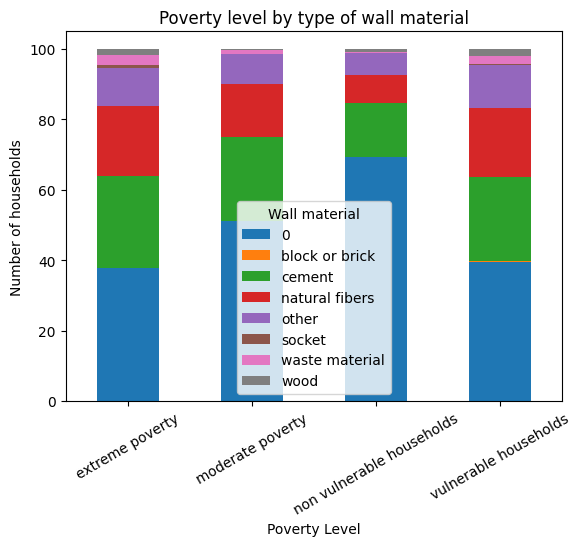

In [14]:
#wall material
hh_data_viz['wall_material'] = hh_data_viz['wall_material'].replace([1,2,3,4,5,6,7,8],
 {'block or brick','socket','cement','waste material','wood','zink','natural fibers','other'})
grouped1 = hh_data_viz.groupby(['Target','wall_material'])['idhogar'].nunique().unstack()
grouped_percentage = grouped1.div(grouped1.sum(axis=1), axis=0) * 100
grouped_percentage.plot(kind='bar', stacked=True)
plt.xlabel('Poverty Level')
plt.ylabel('Number of households')
plt.title('Poverty level by type of wall material')
plt.legend(title='Wall material')
plt.xticks(rotation=30)
plt.show()

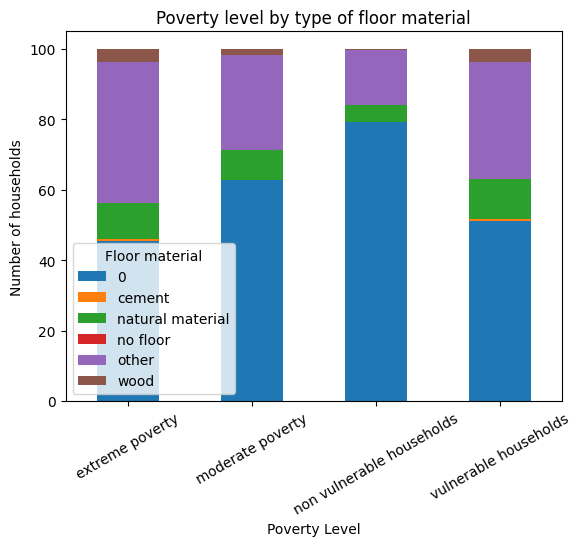

In [15]:
#floor material
hh_data_viz['floor_material'] = hh_data_viz['floor_material'].replace([1,2,3,4,5,6],
 {'bmosaic,  ceramic,  terrazo','cement','other','natural material','no floor','wood'})
grouped1 = hh_data_viz.groupby(['Target','floor_material'])['idhogar'].nunique().unstack()
grouped_percentage = grouped1.div(grouped1.sum(axis=1), axis=0) * 100
grouped_percentage.plot(kind='bar', stacked=True)
plt.xlabel('Poverty Level')
plt.ylabel('Number of households')
plt.title('Poverty level by type of floor material')
plt.legend(title='Floor material')
plt.xticks(rotation=30)

plt.show()

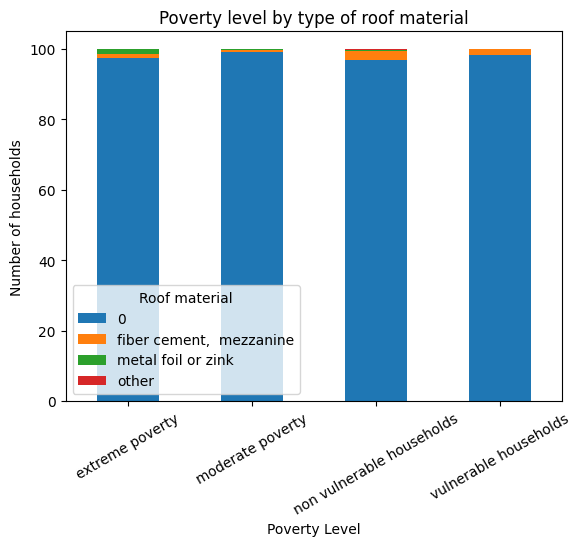

In [16]:
#roof material
hh_data_viz['roof_material'] = hh_data_viz['roof_material'].replace([1,2,3,4],
 {'metal foil or zink','fiber cement,  mezzanine','natural fibre','other'})
grouped1 = hh_data_viz.groupby(['Target','roof_material'])['idhogar'].nunique().unstack()
grouped_percentage = grouped1.div(grouped1.sum(axis=1), axis=0) * 100
grouped_percentage.plot(kind='bar', stacked=True)
plt.xlabel('Poverty Level')
plt.ylabel('Number of households')
plt.title('Poverty level by type of roof material')
plt.legend(title='Roof material')
plt.xticks(rotation=30)
plt.show()

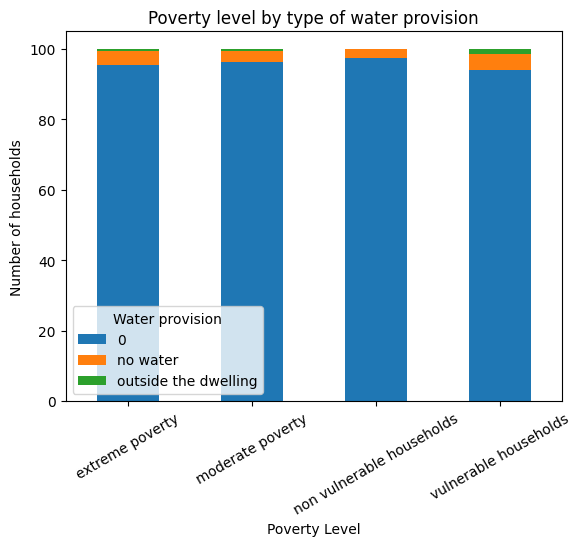

In [17]:
#water
hh_data_viz['water'] = hh_data_viz['water'].replace([1,2,3],
 {'inside the dwelling','outside the dwelling','no water'})
grouped1 = hh_data_viz.groupby(['Target','water'])['idhogar'].nunique().unstack()
grouped_percentage = grouped1.div(grouped1.sum(axis=1), axis=0) * 100
grouped_percentage.plot(kind='bar', stacked=True)
plt.xlabel('Poverty Level')
plt.ylabel('Number of households')
plt.title('Poverty level by type of water provision')
plt.legend(title='Water provision')
plt.xticks(rotation=30)

plt.show()

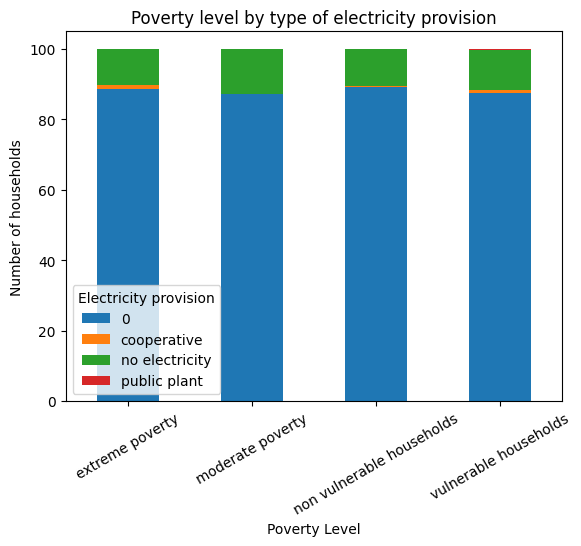

In [18]:
#electricity
hh_data_viz['electricity'] = hh_data_viz['electricity'].replace([1,2,3,4],
 {'public plant','private plant','no electricity','cooperative'})
grouped1 = hh_data_viz.groupby(['Target','electricity'])['idhogar'].nunique().unstack()
grouped_percentage = grouped1.div(grouped1.sum(axis=1), axis=0) * 100
grouped_percentage.plot(kind='bar', stacked=True)
plt.xlabel('Poverty Level')
plt.ylabel('Number of households')
plt.title('Poverty level by type of electricity provision')
plt.legend(title='Electricity provision')
plt.xticks(rotation=30)

plt.show()

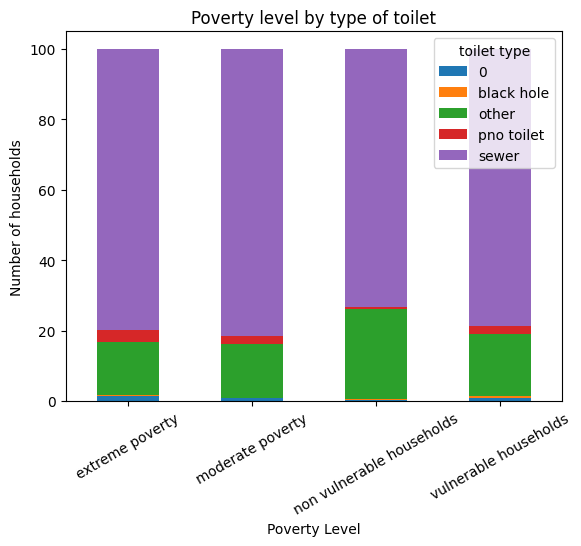

In [19]:
#toilet
hh_data_viz['toilet'] = hh_data_viz['toilet'].replace([1,2,3,4,5],
 {'pno toilet','sewer','septic tank','black hole','other'})
grouped1 = hh_data_viz.groupby(['Target','toilet'])['idhogar'].nunique().unstack()
grouped_percentage = grouped1.div(grouped1.sum(axis=1), axis=0) * 100
grouped_percentage.plot(kind='bar', stacked=True)
plt.xlabel('Poverty Level')
plt.ylabel('Number of households')
plt.title('Poverty level by type of toilet')
plt.legend(title='toilet type')
plt.xticks(rotation=30)

plt.show()

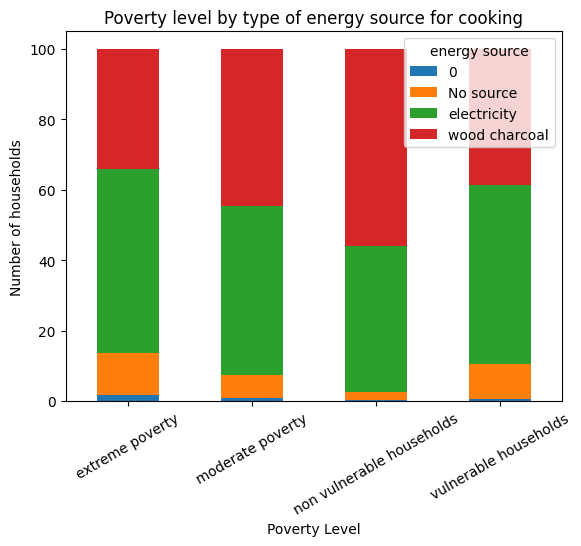

In [20]:
#energy
hh_data_viz['energy'] = hh_data_viz['energy'].replace([1,2,3,4],
 {'No source','electricity','gas','wood charcoal'})
grouped1 = hh_data_viz.groupby(['Target','energy'])['idhogar'].nunique().unstack()
grouped_percentage = grouped1.div(grouped1.sum(axis=1), axis=0) * 100
grouped_percentage.plot(kind='bar', stacked=True)
plt.xlabel('Poverty Level')
plt.ylabel('Number of households')
plt.title('Poverty level by type of energy source for cooking')
plt.legend(title='energy source')
plt.xticks(rotation=30)

plt.show()

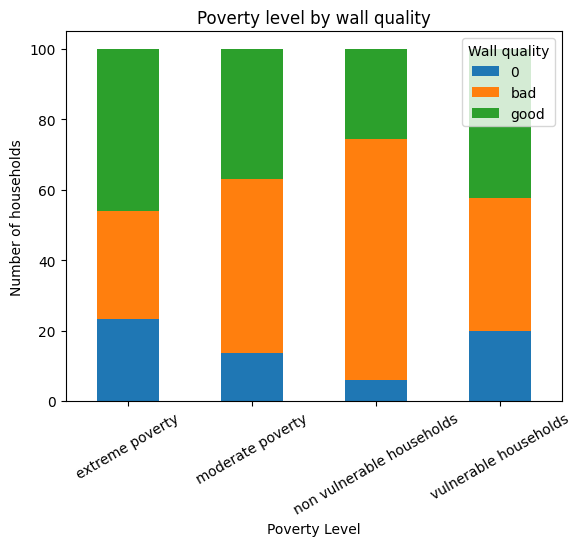

In [21]:
#wall quality
hh_data_viz['wall_quality'] = hh_data_viz['wall_quality'].replace([1,2,3],
 {'bad','regular','good'})
grouped1 = hh_data_viz.groupby(['Target','wall_quality'])['idhogar'].nunique().unstack()
grouped_percentage = grouped1.div(grouped1.sum(axis=1), axis=0) * 100
grouped_percentage.plot(kind='bar', stacked=True)
plt.xlabel('Poverty Level')
plt.ylabel('Number of households')
plt.title('Poverty level by wall quality')
plt.legend(title='Wall quality')
plt.xticks(rotation=30)

plt.show()

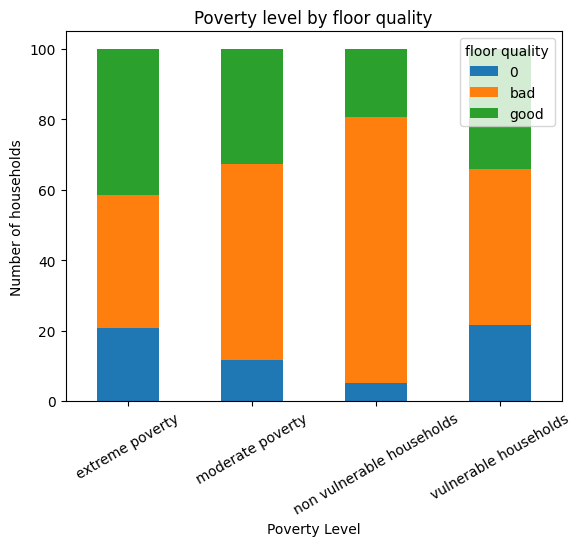

In [22]:
#floor quality
hh_data_viz['floor_quality'] = hh_data_viz['floor_quality'].replace([1,2,3],
 {'bad','regular','good'})
grouped1 = hh_data_viz.groupby(['Target','floor_quality'])['idhogar'].nunique().unstack()
grouped_percentage = grouped1.div(grouped1.sum(axis=1), axis=0) * 100
grouped_percentage.plot(kind='bar', stacked=True)
plt.xlabel('Poverty Level')
plt.ylabel('Number of households')
plt.title('Poverty level by floor quality')
plt.legend(title='floor quality')
plt.xticks(rotation=30)

plt.show()

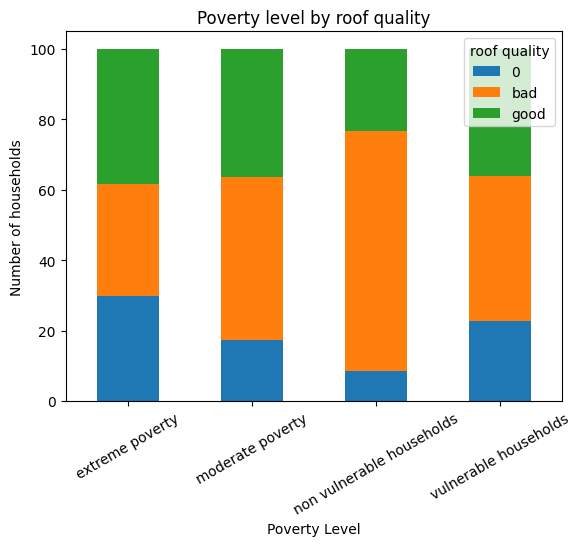

In [23]:
#roof quality
hh_data_viz['roof_quality'] = hh_data_viz['roof_quality'].replace([1,2,3],
 {'bad','regular','good'})
grouped1 = hh_data_viz.groupby(['Target','roof_quality'])['idhogar'].nunique().unstack()
grouped_percentage = grouped1.div(grouped1.sum(axis=1), axis=0) * 100
grouped_percentage.plot(kind='bar', stacked=True)
plt.xlabel('Poverty Level')
plt.ylabel('Number of households')
plt.title('Poverty level by roof quality')
plt.legend(title='roof quality')
plt.xticks(rotation=30)

plt.show()

### Feature Engineering

In [10]:
#Remove columns with high correlation with other columns
corr_matrix = hh_data.drop(columns=['Target']).set_index('idhogar').corr().abs()


columns_to_drop = set()
columns_set = set()
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        if corr_matrix.iloc[i, j] >= 0.95 and corr_matrix.iloc[i, j] < 1:
            columns_set.add(corr_matrix.columns[j])
            columns_set.add(corr_matrix.columns[i])
            if hh_data[corr_matrix.columns[i]].corr(hh_data['Target']) >  hh_data[corr_matrix.columns[j]].corr(hh_data['Target']):
                columns_to_drop.add(corr_matrix.columns[j])
            else:
                columns_to_drop.add(corr_matrix.columns[i])
columns_to_drop.remove('hhsize')
hh_data = hh_data.drop(columns=columns_to_drop)
len(hh_data.columns)

66

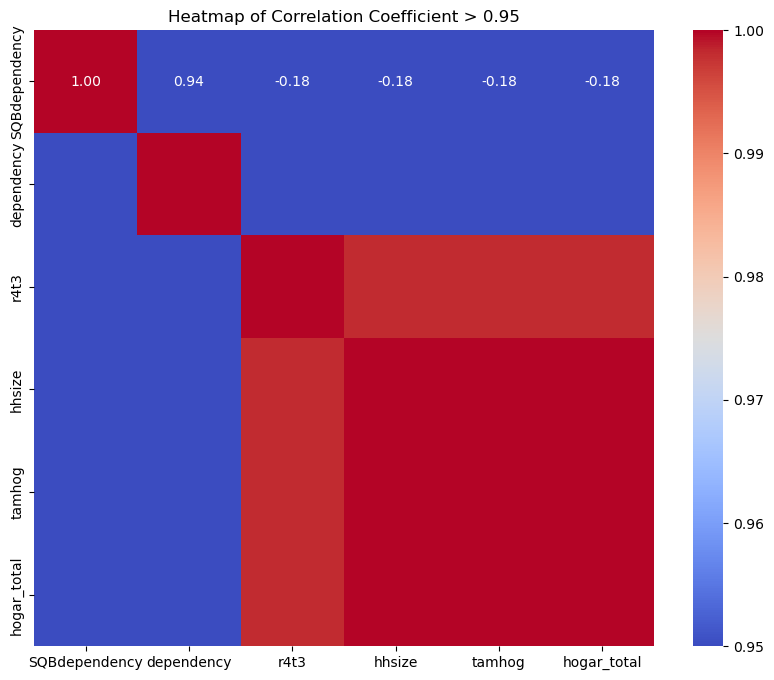

In [11]:
high_cor = data[list(columns_set)]
plt.figure(figsize=(10, 8))
sns.heatmap(high_cor.corr(), annot=True, cmap='coolwarm', fmt=".2f", vmin=0.95, vmax=1)
plt.title('Heatmap of Correlation Coefficient > 0.95')
plt.show()

In [12]:
#Aggregate individual-level features to add to the household level data
ind_agg = ind_data.drop(axis = 1, labels = ['Target','Id']).groupby('idhogar').agg(['min', 'max', 'sum','mean'])
ind_agg.columns = [f"{i}-{j}" for i in ind_agg.columns.levels[0] for j in ind_agg.columns.levels[1]]
ind_agg.head()

,v18q-min,v18q-max,v18q-sum,v18q-mean,dis-min,dis-max,dis-sum,dis-mean,male-min,male-max,...,mobilephone-sum,mobilephone-mean,escolari-min,escolari-max,escolari-sum,escolari-mean,age-min,age-max,age-sum,age-mean
idhogar,,,,,,,,,,,,,,,,,,,,,
001ff74ca,1,1,2,1.0,0,0,0,0.0,0,0,...,2,1.0,0,16,16,8.000000,0,38,38,19.000000
003123ec2,0,0,0,0.0,0,0,0,0.0,0,1,...,4,1.0,0,7,13,3.250000,1,24,51,12.750000
004616164,0,0,0,0.0,0,0,0,0.0,1,1,...,2,1.0,3,11,14,7.000000,16,50,66,33.000000
004983866,0,0,0,0.0,0,0,0,0.0,0,1,...,2,1.0,7,8,15,7.500000,16,59,75,37.500000
005905417,0,0,0,0.0,0,0,0,0.0,0,1,...,3,1.0,0,9,17,5.666667,6,32,52,17.333333


In [13]:
#Remove columns with high correlation with other columns
corr_matrix = ind_agg.corr().abs()

columns_to_drop = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        if corr_matrix.iloc[i, j] >= 0.95:
            col_name = corr_matrix.columns[j]
            columns_to_drop.add(col_name)

ind_agg = ind_agg.drop(columns=columns_to_drop)
len(ind_agg.columns)

119

In [14]:
#Combine selected household level and individual level features
features = pd.merge(hh_data, ind_agg, on="idhogar").set_index('idhogar')
#Find correlation of features with target variable and keep only those with high correlation
correlation_with_target = features.corrwith(features['Target']).drop('Target')
correlation_with_target=correlation_with_target.dropna()
selected_features=correlation_with_target[(correlation_with_target > 0.2) | (correlation_with_target < -0.2)].index.tolist()
selected_features.append('Target')

/opt/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [ ]:
ind_features = [f for f in ind_agg.columns if f in selected_features]
ind_features

In [15]:
final_data = features[selected_features]

## Model Selection

In [16]:
X = final_data.iloc[:,:-1]
y = final_data.iloc[:,-1]
X.head()

,rooms,r4m1,r4t1,cielorazo,hogar_nin,edjefe,meaneduc,overcrowding,SQBescolari,SQBedjefe,...,instlevel2-max,instlevel2-sum,instlevel2-mean,instlevel8-max,instlevel8-sum,instlevel8-mean,escolari-min,escolari-max,escolari-sum,escolari-mean
idhogar,,,,,,,,,,,,,,,,,,,,,
21eb7fcc1,3,0,0,1,0,10.0,10.0,1.000000,100,100,...,0,0,0.00,0,0,0.0,10,10,10,10.00
0e5d7a658,4,0,0,1,0,12.0,12.0,1.000000,144,144,...,0,0,0.00,1,1,1.0,12,12,12,12.00
2c7317ea8,8,0,0,1,0,0.0,11.0,0.500000,121,0,...,0,0,0.00,0,0,0.0,11,11,11,11.00
2b58d945f,5,1,1,1,2,11.0,11.0,1.333333,121,121,...,1,1,0.25,0,0,0.0,2,11,33,8.25
d6dae86b7,2,2,2,1,2,9.0,10.0,4.000000,81,81,...,1,1,0.25,0,0,0.0,0,11,23,5.75


In [84]:
#Divide data in training and testing sets
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=1001)

In [74]:
# Import model libraries
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,f1_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate 
from sklearn.metrics import confusion_matrix

### Multilayer Perceptron

In [43]:
#Transform features
scaler = StandardScaler()
X_train_mlp = scaler.fit_transform(X_train)
X_test_mlp = scaler.transform(X_test)

In [44]:
#fit the model
mlp = MLPClassifier(max_iter=1000, random_state=42)
mlp.fit(X_train_mlp, y_train)
y_pred = mlp.predict(X_test_mlp)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred,average = 'macro')
print(f"Accuracy: {accuracy:.2f},F1 Score: {f1:.2f}")

Accuracy: 0.60,F1 Score: 0.34


/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [51]:
#Hyperparameter tuning of MLP
parameter_space = {
    'hidden_layer_sizes': [(10,30,10),(20,40,60)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
clf = GridSearchCV(mlp, parameter_space,scoring='f1_weighted', n_jobs=-1, cv=5)
clf.fit(X_train_mlp, y_train)
mlp_best = clf.best_estimator_
mlp_f1=clf.best_score_

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_netwo

In [53]:
#Best model and score along with cross-validation 
scores = cross_validate(mlp_best, X_test, y_test, scoring=['accuracy', 'f1_macro'], return_train_score=True)
mean_train_f1 =  np.mean(scores['train_f1_macro'])
mean_test_f1 = np.mean(scores['test_f1_macro'])  
mean_train_accuracy =  np.mean(scores['train_accuracy'])
mean_test_accuracy = np.mean(scores['test_accuracy']) 
print("mean train score: {:.3f} test score: {:.3f}".format(mean_train_f1, mean_test_f1))
mlp_best_f1 = mean_test_f1
mlp_best_acc = mean_test_accuracy

mean train score: nan test score: nan


### Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)
y_pred = logisticRegr.predict(X_test)
accuracy_score(y_test, y_pred)*100
f1_score(y_test, y_pred,average = 'macro')*100

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


30.967432950191565

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

8.0


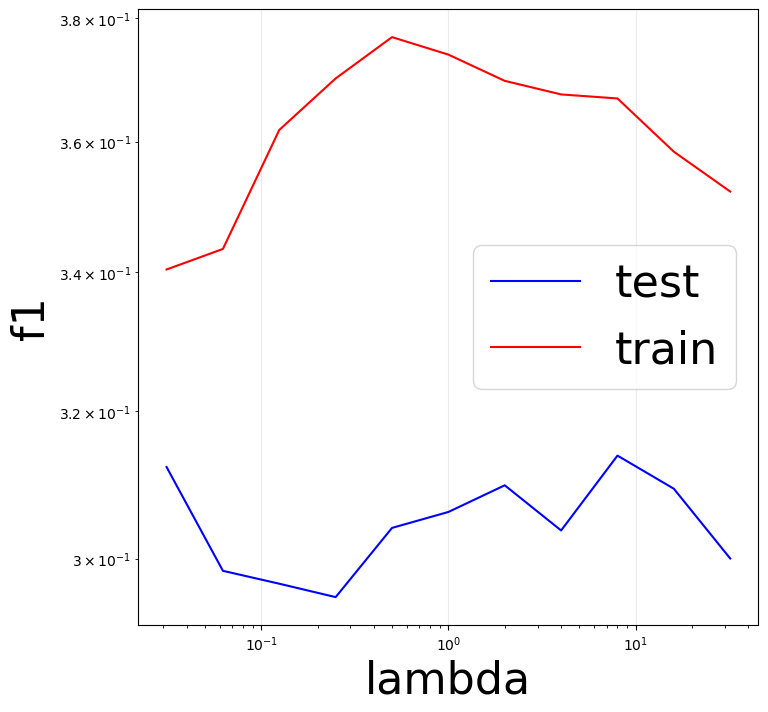

In [55]:
lambdas = np.logspace(5, -5, 11, base=2)
best_score, best_lambda = 0, None
mean_train_f1, mean_test_f1, mean_train_accuracy, mean_test_accuracy = [], [],[],[]

for l in lambdas:
    logreg = LogisticRegression(C=l)
    scores = cross_validate(logreg, X_test, y_test,scoring=['accuracy', 'f1_macro'], return_train_score=True)
    mean_train_f1.append(np.mean(scores['train_f1_macro']))
    mean_test_f1.append(np.mean(scores['test_f1_macro'])) 
    mean_train_accuracy.append(np.mean(scores['train_accuracy']))
    mean_test_accuracy.append(np.mean(scores['test_accuracy'])) 

best_f1 = np.max(mean_test_f1)
best_acc = np.max(mean_test_f1)
best_lambda = lambdas[np.where(mean_test_f1==best_f1)][0]
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,8))
ax.loglog(lambdas, mean_test_f1, color="blue")
ax.loglog(lambdas, mean_train_f1, color="red")
ax.grid(alpha=0.25)
ax.set_xlabel("lambda", fontsize=32)
ax.set_ylabel("f1", fontsize=32)
ax.legend(["test", "train"], fontsize=32)
print(best_lambda)

In [66]:
#Best model and score
lr_best = LogisticRegression(C=best_lambda)
scores = cross_validate(lr_best, X_test, y_test, scoring=['accuracy', 'f1_macro'], return_train_score=True)
mean_train_f1 =  np.mean(scores['train_f1_macro'])
mean_test_f1 = np.mean(scores['test_f1_macro'])  
mean_train_accuracy =  np.mean(scores['train_accuracy'])
mean_test_accuracy = np.mean(scores['test_accuracy']) 
print("mean train score: {:.3f} test score: {:.3f}".format(mean_train_f1, mean_test_f1))
lr_best_f1 = mean_test_f1
lr_best_acc = mean_test_accuracy

mean train score: 0.367 test score: 0.314


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

### KNN

In [58]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

neighbors = [5, 7, 9, 11, 13, 15, 20]

train_accuracies = {}
test_accuracies = {}
train_f1 = {}
test_f1 = {}

for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    y_train_pred = knn.predict(X_train)
    train_accuracies[n] = accuracy_score(y_train, y_train_pred)
    train_f1[n] = f1_score(y_train, y_train_pred,average="macro")


    y_test_pred = knn.predict(X_test)
    test_accuracies[n] = accuracy_score(y_test, y_test_pred)
    test_f1[n] = f1_score(y_test, y_test_pred,average="macro")


print("Printing accuracies for training accuracies")
for n, accuracy in train_f1.items():
    print(f"Number of Neighbors: {n}, Accuracy: {accuracy}")

print("Printing accuracies for testing data")
for n, accuracy in test_f1.items():
    print(f"Number of Neighbors: {n}, Accuracy: {accuracy}")

best_k = max(test_f1)

Printing accuracies for training accuracies
Number of Neighbors: 5, Accuracy: 0.5461267041955107
Number of Neighbors: 7, Accuracy: 0.470130723342572
Number of Neighbors: 9, Accuracy: 0.43772425952036526
Number of Neighbors: 11, Accuracy: 0.40569385821565274
Number of Neighbors: 13, Accuracy: 0.39998796667300535
Number of Neighbors: 15, Accuracy: 0.379754086998949
Number of Neighbors: 20, Accuracy: 0.3258963619305768
Printing accuracies for testing data
Number of Neighbors: 5, Accuracy: 0.36193716549530913
Number of Neighbors: 7, Accuracy: 0.3543165621812513
Number of Neighbors: 9, Accuracy: 0.3323754332118475
Number of Neighbors: 11, Accuracy: 0.3324915041527419
Number of Neighbors: 13, Accuracy: 0.3187121219091079
Number of Neighbors: 15, Accuracy: 0.30942205942205947
Number of Neighbors: 20, Accuracy: 0.3169705400758289


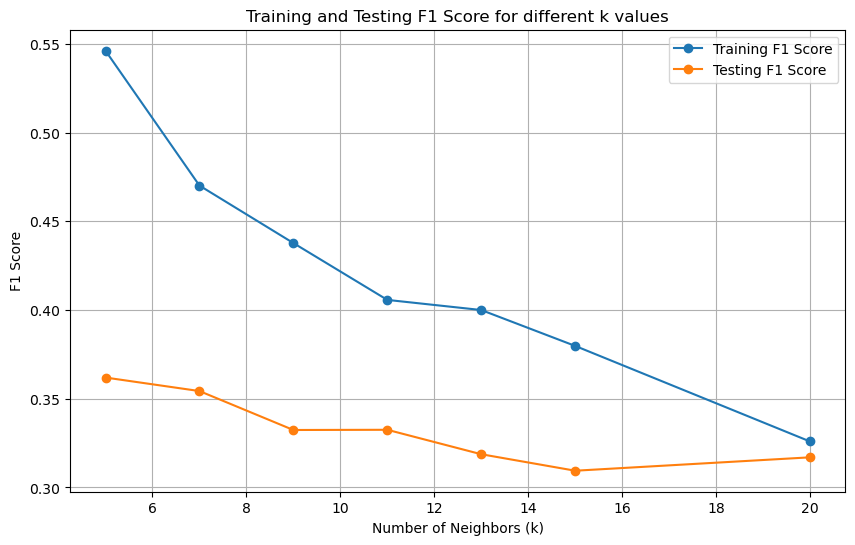

In [59]:
# Plot the training and testing accuracies
plt.figure(figsize=(10, 6))
plt.plot(
    neighbors, list(train_f1.values()), label="Training F1 Score", marker="o"
)
plt.plot(
    neighbors, list(test_f1.values()), label="Testing F1 Score", marker="o"
)
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("F1 Score")
plt.title("Training and Testing F1 Score for different k values")
plt.legend()
plt.show()

In [65]:
#Best model and score
knn_best = KNeighborsClassifier(n_neighbors=best_k)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_validate(knn_best, X_test, y_test, scoring=['accuracy', 'f1_macro'], return_train_score=True,cv=kf)
mean_train_f1 =  np.mean(scores['train_f1_macro'])
mean_test_f1 = np.mean(scores['test_f1_macro'])  
mean_train_accuracy =  np.mean(scores['train_accuracy'])
mean_test_accuracy = np.mean(scores['test_accuracy']) 
print("mean train score: {:.3f} test score: {:.3f}".format(mean_train_f1, mean_test_f1))
knn_best_f1 = mean_test_f1
knn_best_acc = mean_test_accuracy

mean train score: 0.273 test score: 0.227


In [61]:
from sklearn.ensemble import GradientBoostingRegressor  # or GradientBoostingClassifier for classification tasks
from sklearn.model_selection import cross_val_score, KFold

In [63]:
gbreg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
scores = cross_validate(gbreg, X_test, y_test, scoring=['accuracy', 'f1_macro'], return_train_score=True,cv=kf)
mean_train_f1 =  np.mean(scores['train_f1_macro'])
mean_test_f1 = np.mean(scores['test_f1_macro'])  
mean_train_accuracy =  np.mean(scores['train_accuracy'])
mean_test_accuracy = np.mean(scores['test_accuracy']) 
print("mean train score: {:.3f} test score: {:.3f}".format(mean_train_f1, mean_test_f1))
lr_best_f1 = mean_test_f1
lr_best_acc = mean_test_accuracy

/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/_param_validation.py", line 192, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py", line 221,

mean train score: nan test score: nan


/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/_param_validation.py", line 192, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py", line 221,

In [71]:
performance_matrix = pd.DataFrame({'model':['MLP','Logistic Regression', 'KNN','MLP','Logistic Regression', 'KNN'], 
                                   'matrix': ["Accuracy","Accuracy","Accuracy","F1 Score","F1 Score","F1 Score"],
                                    "value":[mlp_best_acc,lr_best_acc,knn_best_acc, mlp_best_f1,lr_best_f1,knn_best_f1]})

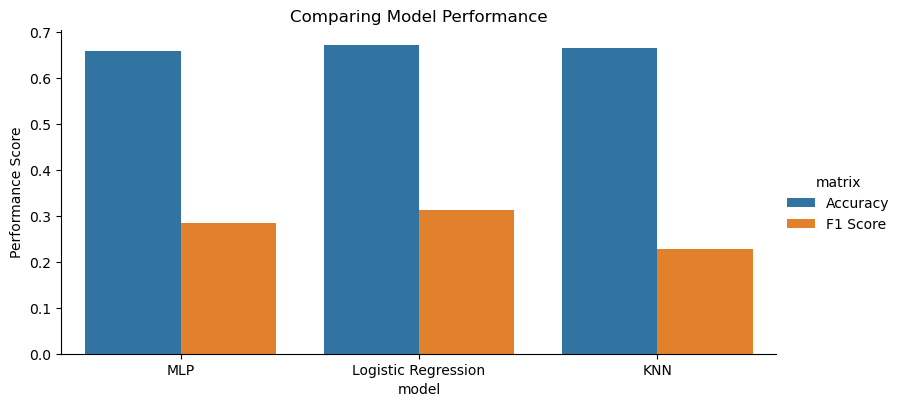

In [73]:
sns.catplot(x='model', y='value', hue='matrix', data=performance_matrix, kind='bar', height=4, aspect=2)
plt.ylabel("Performance Score")
plt.title('Comparing Model Performance')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


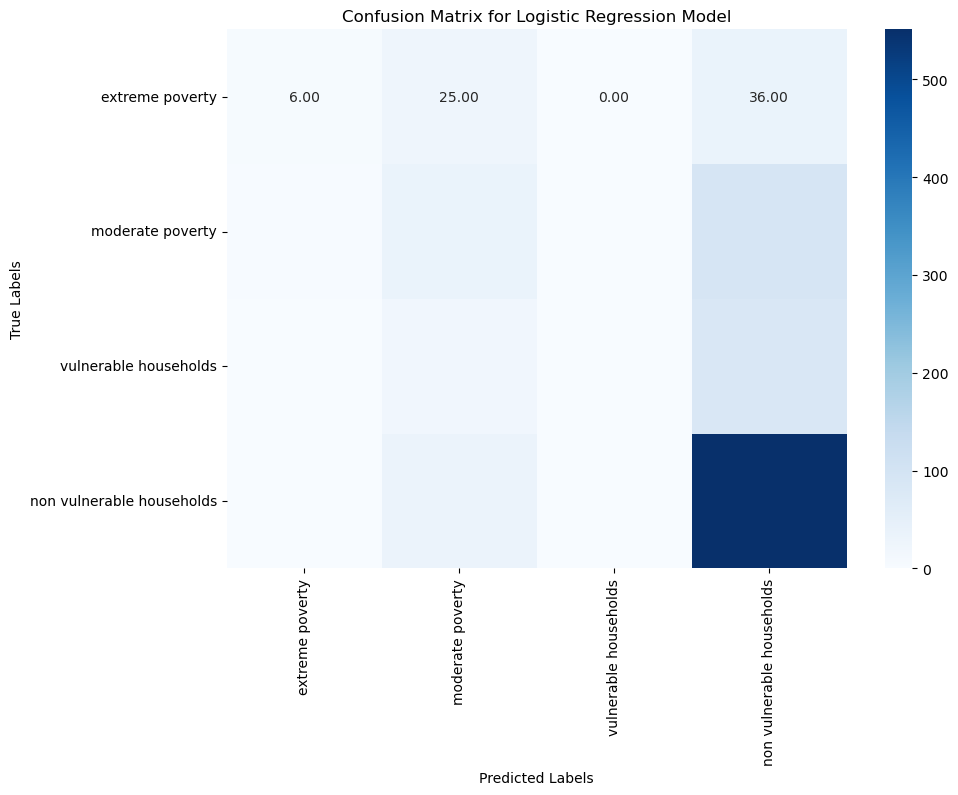

In [91]:
#Plot confusion matrix for best model
lr_best.fit(X_train, y_train)
y_pred = lr_best.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, fmt="d",annot=True, cmap='Blues', xticklabels=['extreme poverty', 'moderate poverty', 'vulnerable households', 'non vulnerable households']
            , yticklabels=['extreme poverty', 'moderate poverty', 'vulnerable households', 'non vulnerable households'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()